# Lax-Wendroff scheme

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Space discretisation:

In [2]:
nx = 101

x_max = +2.
x_min = -2.

delta_x = (x_max - x_min)/(nx - 1)

x = np.linspace(x_min, x_max, nx)
#print(x.shape)

### Initial condition

In [3]:
def u_x(x_axis):
    
    return np.exp(-0.5*(x/0.4)**2)


In [4]:
# Define IC:

u_0 = u_x(x)

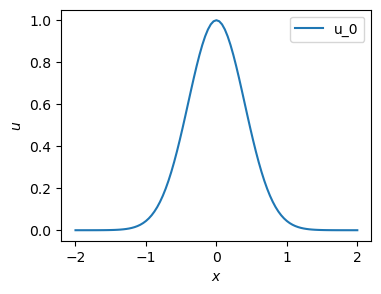

In [5]:
# Plotting

plt.figure(figsize=(4,3))

plt.plot(x, u_0, label = "u_0")

plt.xlabel(r"$x$")
plt.ylabel(r"$u$")
plt.legend()

plt.show()



### Time discretisation:

In [6]:
# CFL number
CFL = 0.8

# Speed perturbation
c = 1

# Time step
delta_t = CFL*delta_x/c

# Min/Max time:
t_min = 0.
t_max = 10.

# Time axis:

t = np.arange(t_min, t_max, delta_t)

#print(t.shape)

### Define theta (i.e. the coef of parabolic term)


In [7]:
# For stability and consistency, theta = CFL^2

theta = CFL**2

#theta = 0.2

#print(theta)

### Empty solution array

In [8]:
# Empty array
u_sln = np.zeros((len(t), len(x)))
print(u_sln.shape)

(313, 101)


### Add initial condition

In [9]:
u_sln[0, :] = u_0

#print(u_sln[0, :])

### Time loop:

In [10]:
for j in range(0, len(t) - 1):
    
    for i in range(1, nx - 1):
        
        # Lax-Wendroff scheme
        u_sln[j+1, i] = u_sln[j, i] - 0.5*CFL*(u_sln[j, i+1]\
        - u_sln[j, i-1]) + 0.5*theta*(u_sln[j, i+1]\
        - 2*u_sln[j, i] + u_sln[j, i-1]) 
        
    # Boundary conditions
    u_sln[j+1, 0] = u_sln[j, nx - 2]
    u_sln[j+1, nx - 1] = u_sln[j+1, 0]

print(u_sln.shape)
        

(313, 101)


### Solution plot:

IndexError: index 500 is out of bounds for axis 0 with size 313

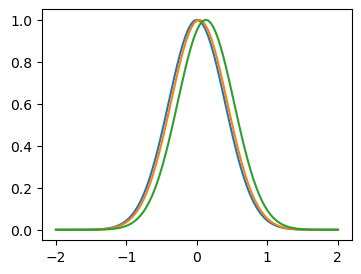

In [11]:
# Plotting

plt.figure(figsize=(4,3))

plt.plot(x, u_0, label = "u_0")
plt.plot(x, u_sln[1, :], label = "u_1")
plt.plot(x, u_sln[4, :], label = "u_4")
plt.plot(x, u_sln[500, :], label = "u_39")
#plt.plot(x, u_sln[125, :], label = "u_125")

plt.xlabel(r"$x$")
plt.ylabel(r"$u$")
plt.legend()

plt.show()



In [ ]:
# Plotting

plt.figure(figsize=(4,3))

plt.pcolor(u_sln)

plt.xlabel(r"$x$")
plt.ylabel(r"$t$")
#plt.legend()

plt.show()

